In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from Qommunity.searchers.hierarchical_searcher import HierarchicalSearcher
from Qommunity.iterative_searcher import IterativeSearcher

## Please use it with QHyper basiav/sampleset_info_extraction branch
https://github.com/qc-lab/QHyper/tree/basiav/sampleset_info_extraction

In [2]:
import os


test_dir = "test"
os.makedirs(test_dir, exist_ok=True)

In [3]:
n = 100
m = 1
p=0.1

graph_powerlaw_100_path = f"{test_dir}/graph_powerlaw_n={n}_m={m}_p={p}.npy"
try:
    G = np.load(graph_powerlaw_100_path, allow_pickle=True)[0]
    print(f"Graph loaded from {graph_powerlaw_100_path}.")
except Exception as e:
    print(f"Could not load graph from {graph_powerlaw_100_path}. Generating a new one.")
    G = nx.powerlaw_cluster_graph(n=n, m=m, p=p)
    G_arr = np.empty((1,), dtype=object)
    G_arr[0] = G
    np.save(graph_powerlaw_100_path, G_arr)
    print(f"Graph saved to {graph_powerlaw_100_path}.")

Graph loaded from test/graph_powerlaw_n=100_m=1_p=0.1.npy.


## Usage

#### 1. For the `AdvantageSampler`, set `return_metadata=True` and `elapse times=True`

In [ ]:
num_reads = 100
version = ""
region = "na-west-1"

advantage = AdvantageSampler(
    G, num_reads=num_reads, version=version, region=region, use_clique_embedding=True, elapse_times=True, return_metadata=True
)

In [9]:
iterative_searcher = IterativeSearcher(sampler=advantage)

Quick reminder of IterativeSearcher's usage we have practiced so far for full hierarchical runs info:

In [105]:
res_like_before = iterative_searcher.run_with_sampleset_info(
    num_runs=1,
    save_results=False,
    iterative_verbosity=1,
    return_sampleset_metadata=False
)

Starting community detection iterations


100%|██████████| 1/1 [02:59<00:00, 179.58s/it]

Iteration 0 completed


In [14]:
res = res_like_before
communities, modularities, times, division_trees, division_modularities = res.communities, res.modularity, res.time, res.division_tree, res.division_modularities

### 2. Set `return_metadata=True` to `ItearativeSearcher`'s run method

In [10]:
dir_adv_clique = f"{test_dir}/advantage_clique"
os.makedirs(dir_adv_clique, exist_ok=True)

In [ ]:
res = iterative_searcher.run_with_sampleset_info(
    num_runs=5,
    save_results=True,
    saving_path=dir_adv_clique,
    iterative_verbosity=1,
    return_metadata=True,
)

Starting community detection iterations


  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [02:12<08:50, 132.64s/it]

Iteration 0 completed


 40%|████      | 2/5 [04:01<05:56, 118.82s/it]

Iteration 1 completed


 60%|██████    | 3/5 [06:22<04:17, 128.96s/it]

Iteration 2 completed


 80%|████████  | 4/5 [09:13<02:25, 145.36s/it]

Iteration 3 completed


100%|██████████| 5/5 [12:20<00:00, 148.10s/it]

Iteration 4 completed


In [12]:
communities, modularities, times, division_trees, division_modularities, sampleset_datas = res.communities, res.modularity, res.time, res.division_tree, res.division_modularities, res.samplesets_data

## Sampleset data interpretation

In [66]:
# Shape interpretation
print(f"Data from {len(sampleset_datas)} iteartive runs")
print(f"Number of Problem (QUBO) forumulations in the first run: {len(sampleset_datas[0].dwave_sampleset_metadata)}")
print(f"Number of Problem (QUBO) forumulations in the second run: {len(sampleset_datas[1].dwave_sampleset_metadata)}")
assert len(sampleset_datas[0].dwave_sampleset_metadata) == len(sampleset_datas[0].time_measurements)
assert len(sampleset_datas[1].dwave_sampleset_metadata) == len(sampleset_datas[1].time_measurements)

Data from 5 iteartive runs
Number of Problem (QUBO) forumulations in the first run: 26
Number of Problem (QUBO) forumulations in the second run: 23


In [14]:
sampleset_datas

array([HierarchicalRunMetadata(dwave_sampleset_metadata=rec.array([(24068., 20., 200.1 , 39832.76, 1213.24, 15764.76, 20.58, 143., 143.),
                  (13716., 20.,  96.58, 29479.56, 1157.44, 15763.56, 20.58,  27.,  27.),
                  (20638., 20., 165.8 , 36400.36,  713.64, 15762.36, 20.58,  24.,  24.),
                  (12660., 20.,  86.02, 28423.56, 1396.44, 15763.56, 20.58,   1.,   1.),
                  (12412., 20.,  83.54, 28175.96, 1005.04, 15763.96, 20.58,  14.,  14.),
                  (12368., 20.,  83.1 , 28131.96,  767.04, 15763.96, 20.58,   1.,   1.),
                  (19750., 20., 156.92, 35513.16, 1403.84, 15763.16, 20.58,   1.,   1.),
                  (20638., 20., 165.8 , 36401.16, 1110.84, 15763.16, 20.58,  24.,  24.),
                  (14990., 20., 109.32, 30753.56, 1079.44, 15763.56, 20.58,   1.,   1.),
                  (12500., 20.,  84.42, 28263.16, 1099.84, 15763.16, 20.58,  16.,  16.),
                  (12368., 20.,  83.1 , 28131.96, 1185.04, 15

In [15]:
first_run = sampleset_datas[0]
second_run = sampleset_datas[1]

## Units

**Microseconds (us)** for DWave sampleset metadata (according to DWave docs 2025 https://docs.dwavequantum.com/en/latest/quantum_research/operation_timing.html#qpu-runtime-estimating):

In [19]:
first_run.dwave_sampleset_metadata.dtype.names

('qpu_sampling_time_us',
 'qpu_anneal_time_per_sample_us',
 'qpu_readout_time_per_sample_us',
 'qpu_access_time_us',
 'qpu_access_overhead_time_us',
 'qpu_programming_time_us',
 'qpu_delay_time_per_sample_us',
 'post_processing_overhead_time_us',
 'total_post_processing_time_us')

**Seconds (s)** for custom (embedding and sample function) time measurements:

In [21]:
first_run.time_measurements.dtype.names

('find_clique_embedding_time_s',
 'fixed_embedding_composite_time_s',
 'sample_func_time_s')

# Results structure

The `dwave_sampleset_metdata` field contains information taken from the `sampleset.info["timing"]` field https://docs.dwavequantum.com/en/latest/quantum_research/operation_timing.html#qpu-runtime-estimating. \
The unit is **microseconds (us)**.

In [22]:
# DWave metadata extracted from the DWave "sampleset" result
first_run.dwave_sampleset_metadata

rec.array([(24068., 20., 200.1 , 39832.76, 1213.24, 15764.76, 20.58, 143., 143.),
           (13716., 20.,  96.58, 29479.56, 1157.44, 15763.56, 20.58,  27.,  27.),
           (20638., 20., 165.8 , 36400.36,  713.64, 15762.36, 20.58,  24.,  24.),
           (12660., 20.,  86.02, 28423.56, 1396.44, 15763.56, 20.58,   1.,   1.),
           (12412., 20.,  83.54, 28175.96, 1005.04, 15763.96, 20.58,  14.,  14.),
           (12368., 20.,  83.1 , 28131.96,  767.04, 15763.96, 20.58,   1.,   1.),
           (19750., 20., 156.92, 35513.16, 1403.84, 15763.16, 20.58,   1.,   1.),
           (20638., 20., 165.8 , 36401.16, 1110.84, 15763.16, 20.58,  24.,  24.),
           (14990., 20., 109.32, 30753.56, 1079.44, 15763.56, 20.58,   1.,   1.),
           (12500., 20.,  84.42, 28263.16, 1099.84, 15763.16, 20.58,  16.,  16.),
           (12368., 20.,  83.1 , 28131.96, 1185.04, 15763.96, 20.58,   1.,   1.),
           (10628., 20.,  65.7 , 26391.56, 1573.44, 15763.56, 20.58,   1.,   1.),
           (1499

The `time_measurements` field contains custom measurements we performed ourselves:
- `find_embedding_time_s` / `find_clique_embedding_time_s` - times of `find_embedding` and `find_clique_embedding` function calls
- `fixed_embedding_composite_time_s` - time of the object creation of FixedEmbeddingComposite - constant, quick, just for check
- `sample_func_time_s` - **solver communication time** - connection with the solver through the server

In [23]:
# The times we have explicitly measured in the code
first_run.time_measurements

rec.array([(0.1443974, 0.0266175, 0.0993715),
           (0.1976067, 0.0579474, 0.1170795),
           (0.2738496, 0.0315305, 0.0371049),
           (0.1527682, 0.3362851, 0.0256194),
           (0.2194602, 0.026862 , 0.0324044),
           (0.1354249, 0.0190736, 0.0227821),
           (0.1401513, 0.0208511, 0.0264425),
           (0.1295765, 0.0191886, 0.0270775),
           (0.1489702, 0.0188629, 0.025963 ),
           (0.1450176, 0.0212618, 0.0281077),
           (0.1715421, 0.0272723, 0.030255 ),
           (0.1328004, 0.0162293, 0.0217005),
           (0.1606691, 0.0175149, 0.0205587),
           (0.1528668, 0.0188718, 0.0186495),
           (0.4672844, 0.0181635, 0.0247536),
           (0.4297156, 0.0223982, 0.044612 ),
           (0.1381327, 0.0170944, 0.0231487),
           (0.1936378, 0.0246094, 0.0293207),
           (0.2972434, 0.0373561, 0.0315045),
           (0.2148153, 0.025039 , 0.0244474),
           (0.1903241, 0.0308372, 0.0220878),
           (0.1645188, 0.0301108, 

# QPU access times

Each record contains subdivion (subproblem recursive divisions) times of the whole hierarchical run. \
These times unordered! - they do not necessarily reflect the order of subdivision on each recursion level - TODO \
However the first one reflects the time (qpu_access_time_us in this example) of the very first binary division - of the whole problem.

In [25]:
first_run.dwave_sampleset_metadata.qpu_access_time_us

array([39832.76, 29479.56, 36400.36, 28423.56, 28175.96, 28131.96,
       35513.16, 36401.16, 30753.56, 28263.16, 28131.96, 26391.56,
       30753.16, 22367.56, 28439.16, 29207.56, 35734.76, 33125.56,
       28263.96, 28219.96, 28423.96, 36580.76, 35735.16, 35669.56,
       24017.56, 26391.56])

### Qpu access times in the 1st hierarchical community search run

In [26]:
# sum of subproblems (subdivisions) times in the first run
first_run_qpu_access_time = first_run.dwave_sampleset_metadata.qpu_access_time_us.sum()
print(f"QPU access time in the first run: {first_run_qpu_access_time:.2f} microseconds == {first_run_qpu_access_time / 1e6:.4f} seconds")

QPU access time in the first run: 798828.96 microseconds == 0.7988 seconds


# Getting the embedding from cache 
Calling the `find_clique_embedding` function time - "getting" the embeddings for subproblems from cache

In [65]:
# .find_clique_embedding() function time for subdivisions in the first hierarchical run
first_run.time_measurements.find_clique_embedding_time_s

array([0.1443974, 0.1976067, 0.2738496, 0.1527682, 0.2194602, 0.1354249,
       0.1401513, 0.1295765, 0.1489702, 0.1450176, 0.1715421, 0.1328004,
       0.1606691, 0.1528668, 0.4672844, 0.4297156, 0.1381327, 0.1936378,
       0.2972434, 0.2148153, 0.1903241, 0.1645188, 0.1750687, 0.1620842,
       0.1553091, 0.216386 ])

`sample` function time - communication with the solver

In [ ]:
# .sample() function time for subdivisions in the first hierarchical run
first_run.time_measurements.sample_func_time_s

array([0.0993715, 0.1170795, 0.0371049, 0.0256194, 0.0324044, 0.0227821,
       0.0264425, 0.0270775, 0.025963 , 0.0281077, 0.030255 , 0.0217005,
       0.0205587, 0.0186495, 0.0247536, 0.044612 , 0.0231487, 0.0293207,
       0.0315045, 0.0244474, 0.0220878, 0.0293935, 0.0239471, 0.0259552,
       0.021882 , 0.0244209])

### Obtaining the embeddings time from cache for the whole community search run

In [32]:
first_run_cl_emb_cache_taking = first_run.time_measurements.find_clique_embedding_time_s.sum()
print(f"Time of taking embeddings from cache in the first run: {first_run_cl_emb_cache_taking:.2f} seconds")
print(f"With clique embedding, sampling is fast: {first_run.time_measurements.sample_func_time_s.sum():.2f} seconds")

Time of taking embeddings from cache in the first run: 5.11 seconds
With clique embedding, sampling is fast: 0.86 seconds


# QPU times comparison iterative hierarchical search runs

In [33]:
qpu_access_times_per_hierarachical_run = np.array([run.dwave_sampleset_metadata.qpu_access_time_us.sum() for run in sampleset_datas])
print(f"Mean of QPU access times from 5 runs: {qpu_access_times_per_hierarachical_run.mean():.2f} microseconds")
print(f"STD of QPU access times from 5 runs: {qpu_access_times_per_hierarachical_run.std():.2f} microseconds")
qpu_access_times_per_hierarachical_run

Mean of QPU access times from 5 runs: 725220.42 microseconds
STD of QPU access times from 5 runs: 37871.30 microseconds


array([798828.96, 709913.88, 713414.28, 714186.28, 689758.72])

In [34]:
no_communities_in_runs = [len(communities) for communities in communities]
no_communities_in_runs

[14, 12, 12, 12, 12]

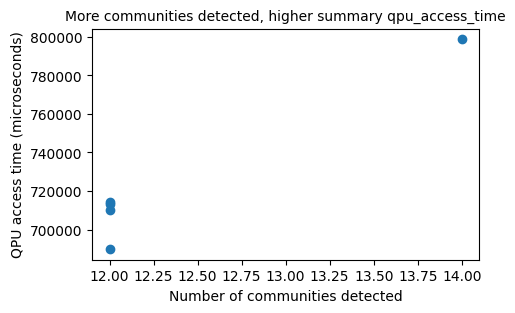

In [35]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(no_communities_in_runs, qpu_access_times_per_hierarachical_run);
ax.set_xlabel("Number of communities detected");
ax.set_ylabel("QPU access time (microseconds)");
plt.title("More communities detected, higher summary qpu_access_time", fontsize=10);

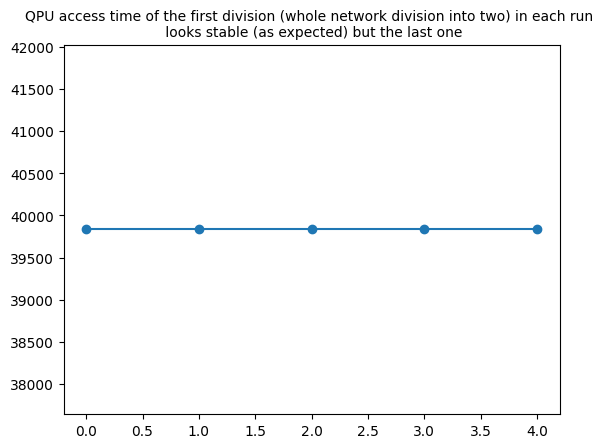

In [37]:
qpu_access_times_first_divisions = [run.dwave_sampleset_metadata.qpu_access_time_us[0] for run in sampleset_datas]
qpu_access_times_first_divisions

plt.plot(qpu_access_times_first_divisions, marker="o")
plt.title("QPU access time of the first division (whole network division into two) in each run \n looks stable (as expected) but the last one", fontsize=10);

### Heuristic

In [38]:
advantage = AdvantageSampler(
    G, num_reads=num_reads, version=version, region=region, use_clique_embedding=False, elapse_times=True, return_sampleset_metadata=True
)

In [39]:
iterative_searcher = IterativeSearcher(advantage)

In [40]:
os.makedirs(f"{test_dir}/heuristic", exist_ok=True)

In [41]:
res_heu = iterative_searcher.run_with_sampleset_info(
    num_runs=5,
    save_results=True,
    saving_path=f"{test_dir}/heuristic/adv_heuristic",
    iterative_verbosity=1,
    return_sampleset_metadata=True,
)

Starting community detection iterations


 20%|██        | 1/5 [07:26<29:45, 446.26s/it]

Iteration 0 completed


 40%|████      | 2/5 [12:48<18:40, 373.35s/it]

Iteration 1 completed


 60%|██████    | 3/5 [21:20<14:32, 436.44s/it]

Iteration 2 completed


 80%|████████  | 4/5 [24:25<05:37, 337.39s/it]

Iteration 3 completed


100%|██████████| 5/5 [34:27<00:00, 413.59s/it]

Iteration 4 completed


In [42]:
communities_heu, modularities_heu, times_heu, division_trees_heu, division_modularities_heu, sampleset_datas_heu = res_heu.communities, res_heu.modularity, res_heu.time, res_heu.division_tree, res_heu.division_modularities, res_heu.samplesets_data

`find_embedding` - heuristic embedding time

In [54]:
# find_embedding times for subdivisions in the first hierarchical run
first_run = sampleset_datas_heu[0]
first_run.time_measurements.find_heuristic_embedding_time_s

array([180.3938653,  18.6414687,   2.0937769,   1.3365376,   0.212603 ,
         0.8925314,   0.2529952,   1.0206537,   0.260631 ,   0.224771 ,
         0.2351557,   0.3418358,  11.4603253,   1.939379 ,   0.3559219,
         0.3140257,   0.3786017,   1.4273488,   0.2729576,   0.2385284,
         0.366778 ,   0.5525911])

`sample` function - communication with the solver

In [56]:
first_run = sampleset_datas_heu[0]
first_run.time_measurements.sample_func_time_s

array([0.1636481, 0.0431659, 0.0289183, 0.0279749, 0.0173655, 0.0258077,
       0.0220367, 0.027769 , 0.0193952, 0.0207995, 0.0238114, 0.0202728,
       0.0563187, 0.0270137, 0.0230981, 0.0201787, 0.0190755, 0.0271363,
       0.023578 , 0.0182567, 0.0402263, 0.0308277])

Results heuristic embedding qpu_access_time

In [44]:
it_searcher_iteration_to_consider = 2

res_heu.samplesets_data[it_searcher_iteration_to_consider].dwave_sampleset_metadata.qpu_access_time_us

array([38002.76, 32587.16, 27372.76, 25192.36, 24209.96, 24630.76,
       26503.56, 27692.36, 30662.36, 25495.96, 26767.96, 25691.96,
       27411.96, 27394.76, 29082.76, 34311.96, 24251.96, 23491.96,
       26910.36, 31259.96, 25163.96, 29028.36, 23139.96, 26447.96])

In [45]:
total_qpu_time_iteration_i = res_heu.samplesets_data[it_searcher_iteration_to_consider].dwave_sampleset_metadata.qpu_access_time_us.sum()
print(f"Total QPU access time for the iteration: {it_searcher_iteration_to_consider}: {total_qpu_time_iteration_i:.2f} microseconds == {total_qpu_time_iteration_i / 1e6:.4f} seconds")

Total QPU access time for the iteration: 2: 662705.84 microseconds == 0.6627 seconds


In [46]:
qpu_access_times_from_5_hierarchical_runs_heu_emb = [run.samplesets_data.dwave_sampleset_metadata.qpu_access_time_us.sum() for run in res_heu]
qpu_access_times_from_5_hierarchical_runs_heu_emb

[612521.12, 661713.04, 662705.84, 535441.24, 620261.9199999999]

In [47]:
qpu_access_times_from_5_hierarchical_runs_heu_emb

[612521.12, 661713.04, 662705.84, 535441.24, 620261.9199999999]

Let's compare them against clique embedding times

In [49]:
# previous runs with clique embedding from top of this notebook
samplesets_metadata_cl_emb_5_runs = np.load(f"{test_dir}/advantage_clique_samplesets_data.pkl", allow_pickle=True)
qpu_access_times_from_5_hierarchical_runs_cl_emb = [run.dwave_sampleset_metadata.qpu_access_time_us.sum() for run in samplesets_metadata_cl_emb_5_runs]
qpu_access_times_from_5_hierarchical_runs_cl_emb

[798828.9600000001,
 709913.8799999999,
 713414.2800000003,
 714186.2800000003,
 689758.72]

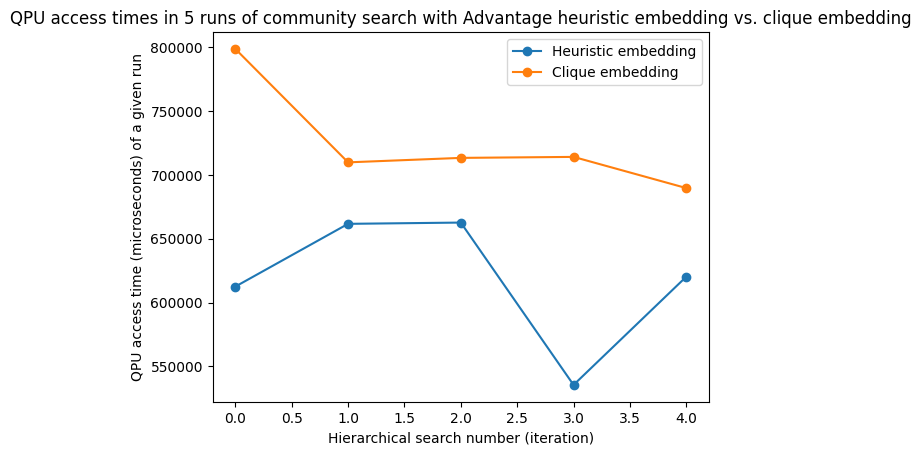

In [50]:
plt.plot(qpu_access_times_from_5_hierarchical_runs_heu_emb, marker="o", label="Heuristic embedding")
plt.plot(qpu_access_times_from_5_hierarchical_runs_cl_emb, marker="o", label="Clique embedding")
plt.legend()
plt.xlabel("Hierarchical search number (iteration)");
plt.ylabel("QPU access time (microseconds) of a given run");
plt.title("QPU access times in 5 runs of community search with Advantage heuristic embedding vs. clique embedding");